## 模拟退火

最优解: 0.007768636359106296
最优值: 6.0351710880028324e-05


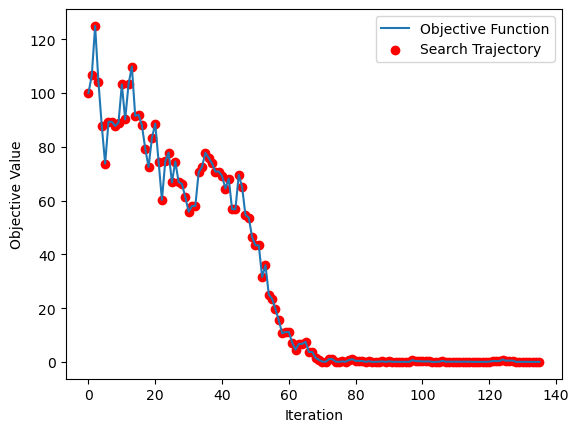

In [2]:
import random
import math
import matplotlib.pyplot as plt

def objective_function(x):
    """目标函数，这里以一个简单的函数 y = x^2 为例"""
    return x ** 2

def simulated_annealing(initial_solution, initial_temperature, final_temperature, cooling_rate):
    current_solution = initial_solution
    best_solution = current_solution
    current_temperature = initial_temperature

    # 用于记录搜索过程的轨迹
    trajectory = [current_solution]

    while current_temperature > final_temperature:
        new_solution = current_solution + random.uniform(-1, 1)  # 扰动生成新解
        current_energy = objective_function(current_solution)
        new_energy = objective_function(new_solution)

        if new_energy < current_energy:
            current_solution = new_solution
            if new_energy < objective_function(best_solution):
                best_solution = new_solution
        else:
            acceptance_probability = math.exp((current_energy - new_energy) / current_temperature)
            if random.random() < acceptance_probability:
                current_solution = new_solution

        current_temperature *= cooling_rate
        trajectory.append(current_solution)

    return best_solution, trajectory

# 设置初始解、初始温度、最终温度和冷却率
initial_solution = 10
initial_temperature = 100
final_temperature = 0.1
cooling_rate = 0.95

# 调用模拟退火算法求解最优解和搜索轨迹
best_solution, trajectory = simulated_annealing(initial_solution, initial_temperature, final_temperature, cooling_rate)

print("最优解:", best_solution)
print("最优值:", objective_function(best_solution))

# 绘制目标函数和搜索轨迹
x = range(len(trajectory))
y = [objective_function(solution) for solution in trajectory]

plt.plot(x, y, label='Objective Function')
plt.scatter(x, y, c='red', label='Search Trajectory')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.legend()
plt.show()

参考文档
https://github.com/perrygeo/simanneal

In [3]:
from simanneal import Annealer
import random


class TSPProblem(Annealer):
    def __init__(self, state):
        self.distance_matrix = [
            [0, 1, 15, 6],
            [1, 0, 7, 3],
            [15, 7, 0, 12],
            [6, 3, 12, 0]
        ]
        super(TSPProblem, self).__init__(state)  # 初始化父类

    def move(self):
        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

    def energy(self):
        total_distance = 0
        for i in range(len(self.state) - 1):
            a = self.state[i]
            b = self.state[i + 1]
            total_distance += self.distance_matrix[a][b]
        return total_distance


# 定义问题的初始状态
initial_state = [0, 1, 2, 3]

# 创建TSPProblem实例
problem = TSPProblem(initial_state)

# 运行模拟退火算法
best_state, best_energy = problem.anneal()

# 打印结果
print("最优状态：", best_state)
print("最优能量：", best_energy)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         14.00    52.60%     8.40%     0:00:00     0:00:00

最优状态： [3, 0, 1, 2]
最优能量： 14


## 粒子群优化

In [5]:
import random

def objective_function(x):
    """目标函数，这里以一个简单的函数 f(x) = x^2 为例"""
    return x ** 2

def particle_swarm_optimization(objective_function, bounds, num_particles, max_iterations):
    # 初始化粒子群
    particles = []
    for _ in range(num_particles):
        position = random.uniform(bounds[0], bounds[1])
        particle = {
            'position': position,
            'velocity': 0,
            'personal_best_position': position,
            'personal_best_value': objective_function(position)
        }
        particles.append(particle)

    # 迭代更新粒子群
    global_best_position = None
    global_best_value = float('inf')
    for _ in range(max_iterations):
        for particle in particles:
            # 更新粒子速度
            if global_best_position is not None:
                particle['velocity'] = random.uniform(-1, 1) * (particle['position'] - particle['personal_best_position']) \
                    + random.uniform(-1, 1) * (global_best_position - particle['position'])
            else:
                particle['velocity'] = random.uniform(-1, 1) * (particle['position'] - particle['personal_best_position'])
            
            # 更新粒子位置
            particle['position'] += particle['velocity']
            
            # 更新个体最优解
            value = objective_function(particle['position'])
            if value < particle['personal_best_value']:
                particle['personal_best_position'] = particle['position']
                particle['personal_best_value'] = value
            
            # 更新全局最优解
            if value < global_best_value:
                global_best_position = particle['position']
                global_best_value = value

    return global_best_position, global_best_value

# 定义目标函数和搜索范围
bounds = (-5, 5)

# 设置粒子群优化算法的参数
num_particles = 50
max_iterations = 100

# 调用粒子群优化算法求解最优解和最优值
best_position, best_value = particle_swarm_optimization(objective_function, bounds, num_particles, max_iterations)

print("最优解:", best_position)
print("最优值:", best_value)

最优解: 8.397875933036363e-19
最优值: 7.052432018667136e-37


参考文档
https://pyswarms.readthedocs.io/en/latest/examples/usecases/inverse_kinematics.html